# 0. Setting

In [135]:
import os
import statsmodels.api as sm     # install statsmodels if not installed
import statsmodels.formula.api as smf
import random
from tqdm import tqdm
import pandas as pd
import numpy as np
from datetime import datetime as dt
from datetime import timedelta
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import math

random.seed(76019367)
mpl.rcParams['agg.path.chunksize'] = 10000

import statsmodels.api as sm     # install statsmodels if not installed
import statsmodels.formula.api as smf

# 1. Data preparing

In [31]:
file_list = list(os.listdir('D:/Working_Place/new_uber/data/data_processed'))
fhvhv_list = []
for filename in file_list:
    if 'f' in filename:
        fhvhv_list.append(filename)
fhvhv_list

['f1902.parquet',
 'f1903.parquet',
 'f1904.parquet',
 'f1905.parquet',
 'f1906.parquet',
 'f1907.parquet',
 'f1908.parquet',
 'f1909.parquet',
 'f1910.parquet',
 'f1911.parquet',
 'f1912.parquet',
 'f2001.parquet',
 'f2002.parquet',
 'f2003.parquet',
 'f2004.parquet',
 'f2005.parquet',
 'f2006.parquet',
 'f2007.parquet',
 'f2008.parquet',
 'f2009.parquet',
 'f2010.parquet',
 'f2011.parquet',
 'f2012.parquet',
 'f2101.parquet',
 'f2102.parquet',
 'f2103.parquet',
 'f2104.parquet',
 'f2105.parquet',
 'f2106.parquet',
 'f2107.parquet',
 'f2108.parquet',
 'f2109.parquet',
 'f2110.parquet',
 'f2111.parquet',
 'f2112.parquet',
 'f2201.parquet',
 'f2202.parquet',
 'f2203.parquet',
 'f2204.parquet',
 'f2205.parquet',
 'f2206.parquet',
 'f2207.parquet',
 'f2208.parquet',
 'f2209.parquet',
 'f2210.parquet',
 'f2211.parquet',
 'f2212.parquet']

In [32]:
data_samples = []

for file in tqdm(fhvhv_list):
    each_data = pd.read_parquet('D:/Working_Place/new_uber/data/data_processed/'+file)
    each_data_sampled = each_data.sample(frac=0.01)
    data_samples.append(each_data_sampled)
    del each_data
    del each_data_sampled

100%|██████████████████████████████████████████████████████████████████████████████████| 47/47 [15:16<00:00, 19.51s/it]


In [33]:
fdata_sample = pd.concat(data_samples)
fdata_sample.head()

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_distance,...,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag,average_speed
index,,,,,,,,,,,,,,,,,,,,,
1079641,HV0003,B02878,B02878,2019-02-02 09:45:14,2019-02-02 09:51:18,2019-02-02 09:52:29,2019-02-02 10:08:57,213,20,8.1788,...,0.00,0.0,2.0,8.31,Y,Y,N,N,NaN,29.831489
18360431,HV0003,B02876,B02876,2019-02-26 14:58:01,2019-02-26 14:58:43,2019-02-26 15:00:49,2019-02-26 15:22:05,173,70,5.0876,...,0.00,0.0,3.0,17.05,N,N,N,N,NaN,14.353730
7290379,HV0005,B02510,None,2019-02-10 20:20:24,NaT,2019-02-10 20:24:16,2019-02-10 20:27:26,48,163,0.5152,...,2.75,0.0,0.0,5.39,N,N,N,N,NaN,10.361564
12815512,HV0003,B02878,B02878,2019-02-18 18:27:56,2019-02-18 18:28:50,2019-02-18 18:31:32,2019-02-18 18:50:35,42,166,1.8515,...,0.00,0.0,0.0,10.77,N,N,N,N,NaN,5.836602
10272561,HV0003,B02872,B02872,2019-02-15 08:32:59,2019-02-15 08:36:00,2019-02-15 08:37:44,2019-02-15 08:49:41,151,239,2.7209,...,2.75,0.0,0.0,7.79,N,N,N,N,NaN,13.680503


In [35]:
len(fdata_sample),fdata_sample.columns

(7188333,
 Index(['hvfhs_license_num', 'dispatching_base_num', 'originating_base_num',
        'request_datetime', 'on_scene_datetime', 'pickup_datetime',
        'dropoff_datetime', 'PULocationID', 'DOLocationID', 'trip_distance',
        'trip_time', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax',
        'congestion_surcharge', 'airport_fee', 'tips', 'driver_pay',
        'shared_request_flag', 'shared_match_flag', 'access_a_ride_flag',
        'wav_request_flag', 'wav_match_flag', 'average_speed'],
       dtype='object'))

# 2. Basic Analysis

# -1. hvfhs_license_number
HV0002 : Juno \
HV0003 : Uber \
HV0004 : Via \
HV0005 : Lyft

In [41]:
fdata_sample_by_license_number = fdata_sample.groupby('hvfhs_license_num').agg({'trip_distance':['count','mean'],
                                                                               'trip_time':'mean',
                                                                               'tips':'mean',
                                                                              'driver_pay':'mean',
                                                                               'average_speed':'mean'})
fdata_sample_by_license_number

trip_distance              trip_time      tips driver_pay  \
                          count      mean         mean      mean       mean   
hvfhs_license_num                                                             
HV0002                    60785  5.883456   991.197828  0.306699  14.158044   
HV0003                  5144087  6.582672  1067.359293  0.661725  15.884411   
HV0004                   133849  5.878428  1241.832206  0.207222   1.972985   
HV0005                  1849612  6.940112  1118.046655  0.874479  14.156139   

                  average_speed  
                           mean  
hvfhs_license_num                
HV0002                19.940504  
HV0003                20.817489  
HV0004                16.784174  
HV0005                20.992043

<AxesSubplot:ylabel='count'>

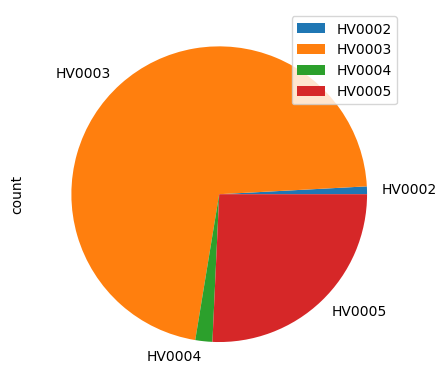

In [45]:
fdata_sample_by_license_number['trip_distance'].plot(kind='pie',y='count')

In [46]:
uber_trip_sample = fdata_sample[fdata_sample.hvfhs_license_num=='HV0003']

# -2. Uber trip sample

In [47]:
uber_trip_sample.head()

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_distance,...,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag,average_speed
index,,,,,,,,,,,,,,,,,,,,,
1079641,HV0003,B02878,B02878,2019-02-02 09:45:14,2019-02-02 09:51:18,2019-02-02 09:52:29,2019-02-02 10:08:57,213,20,8.1788,...,0.00,0.0,2.0,8.31,Y,Y,N,N,NaN,29.831489
18360431,HV0003,B02876,B02876,2019-02-26 14:58:01,2019-02-26 14:58:43,2019-02-26 15:00:49,2019-02-26 15:22:05,173,70,5.0876,...,0.00,0.0,3.0,17.05,N,N,N,N,NaN,14.353730
12815512,HV0003,B02878,B02878,2019-02-18 18:27:56,2019-02-18 18:28:50,2019-02-18 18:31:32,2019-02-18 18:50:35,42,166,1.8515,...,0.00,0.0,0.0,10.77,N,N,N,N,NaN,5.836602
10272561,HV0003,B02872,B02872,2019-02-15 08:32:59,2019-02-15 08:36:00,2019-02-15 08:37:44,2019-02-15 08:49:41,151,239,2.7209,...,2.75,0.0,0.0,7.79,N,N,N,N,NaN,13.680503
5574976,HV0003,B02880,B02880,2019-02-08 20:39:09,2019-02-08 20:39:49,2019-02-08 20:42:41,2019-02-08 20:52:19,90,158,2.0930,...,2.75,0.0,0.0,6.62,N,N,N,N,NaN,13.035986


In [143]:
uber_trip_sample.columns

Index(['hvfhs_license_num', 'dispatching_base_num', 'originating_base_num',
       'request_datetime', 'on_scene_datetime', 'pickup_datetime',
       'dropoff_datetime', 'PULocationID', 'DOLocationID', 'trip_distance',
       'trip_time', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax',
       'congestion_surcharge', 'airport_fee', 'tips', 'driver_pay',
       'shared_request_flag', 'shared_match_flag', 'access_a_ride_flag',
       'wav_request_flag', 'wav_match_flag', 'average_speed'],
      dtype='object')

In [148]:
uber_trip_sample['tip_rate']=uber_trip_sample.apply(lambda x: 100*x.tips/(x.base_passenger_fare+x.tolls+x.bcf+x.sales_tax+x.congestion_surcharge+x.airport_fee),axis=1)
uber_trip_sample

D:\Anaconda\envs\new_uber\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_distance,...,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag,average_speed,tip_rate
index,,,,,,,,,,,,,,,,,,,,,
1079641,HV0003,B02878,B02878,2019-02-02 09:45:14,2019-02-02 09:51:18,2019-02-02 09:52:29,2019-02-02 10:08:57,213,20,8.1788,...,0.0,2.00,8.31,Y,Y,N,N,NaN,29.831489,26.281209
18360431,HV0003,B02876,B02876,2019-02-26 14:58:01,2019-02-26 14:58:43,2019-02-26 15:00:49,2019-02-26 15:22:05,173,70,5.0876,...,0.0,3.00,17.05,N,N,N,N,NaN,14.353730,24.271845
12815512,HV0003,B02878,B02878,2019-02-18 18:27:56,2019-02-18 18:28:50,2019-02-18 18:31:32,2019-02-18 18:50:35,42,166,1.8515,...,0.0,0.00,10.77,N,N,N,N,NaN,5.836602,0.000000
10272561,HV0003,B02872,B02872,2019-02-15 08:32:59,2019-02-15 08:36:00,2019-02-15 08:37:44,2019-02-15 08:49:41,151,239,2.7209,...,0.0,0.00,7.79,N,N,N,N,NaN,13.680503,0.000000
5574976,HV0003,B02880,B02880,2019-02-08 20:39:09,2019-02-08 20:39:49,2019-02-08 20:42:41,2019-02-08 20:52:19,90,158,2.0930,...,0.0,0.00,6.62,N,N,N,N,NaN,13.035986,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2633529,HV0003,B03404,B03404,2022-12-04 19:44:40,2022-12-04 19:46:10,2022-12-04 19:47:23,2022-12-04 19:57:32,161,236,3.2522,...,0.0,0.00,8.72,N,N,,N,N,19.224828,0.000000
2098702,HV0003,B03404,B03404,2022-12-03 23:50:26,2022-12-03 23:59:09,2022-12-03 23:59:57,2022-12-04 00:09:42,256,79,3.9767,...,0.0,1.00,10.49,N,N,,N,N,24.472000,5.285412
10187430,HV0003,B03404,B03404,2022-12-16 07:39:15,2022-12-16 07:43:05,2022-12-16 07:43:54,2022-12-16 08:09:26,140,143,4.7334,...,0.0,0.00,29.44,N,N,,N,N,11.122872,0.000000


In [149]:
uber_daily = uber_trip_sample.groupby([uber_trip_sample.pickup_datetime.dt.year,
                                       uber_trip_sample.pickup_datetime.dt.month,
                                        uber_trip_sample.pickup_datetime.dt.day]).agg({'trip_distance':['count','mean'],
                                                                                      'trip_time':'mean',
                                                                                      'base_passenger_fare':'mean',
                                                                                      'tips':'mean',
                                                                                       'tip_rate':['min','max','mean'],
                                                                                      'driver_pay':'mean',
                                                                                      'average_speed':'mean'})
uber_daily

trip_distance            \
                                                        count      mean   
pickup_datetime pickup_datetime pickup_datetime                           
2019            2               1                        5366  6.078467   
                                2                        5548  6.041302   
                                3                        4603  6.413851   
                                4                        3631  6.647309   
                                5                        3578  6.517157   
...                                                       ...       ...   
2022            12              27                       3085  6.745263   
                                28                       3250  6.919215   
                                29                       3563  6.867868   
                                30                       3917  7.079310   
                                31                       4583  6.346063   

                                                   trip_time  \
                                                        mean   
pickup_datetime pickup_datetime pickup_datetime                
2019            2               1                1091.551808   
                                2                1032.207823   
                                3                 985.612644   
                                4                1109.146241   
                                5                1093.244271   
...                                                      ...   
2022            12              27               1073.272285   
                                28               1118.003077   
                                29               1118.622790   
                                30               1164.139392   
                                31                968.091643   

                                                base_passenger_fare      tips  \
                                                               mean      mean   
pickup_datetime pickup_datetime pickup_datetime                                 
2019            2               1                         14.639268  0.398181   
                                2                         13.074858  0.298643   
                                3                         13.193002  0.289366   
                                4                         14.399882  0.370903   
                                5                         14.524715  0.382289   
...                                                             ...       ...   
2022            12              27                        21.065964  1.089507   
                                28                        21.192523  0.968366   
                                29                        20.945408  0.939545   
                                30                        21.384552  0.904616   
                                31                        20.742121  0.839400   

                                                tip_rate              \
                                                     min         max   
pickup_datetime pickup_datetime pickup_datetime                        
2019            2               1                    0.0  210.526316   
                                2                    0.0   96.153846   
                                3                    0.0   96.339114   
                                4                    0.0  124.069479   
                                5                    0.0  833.333333   
...                                                  ...         ...   
2022            12              27                   0.0  107.353731   
                                28                   0.0   91.116173   
                                29                   0.0   63.897764   
                                30                   0.0  111.012433   
                             

<AxesSubplot:xlabel='pickup_datetime,pickup_datetime,pickup_datetime'>

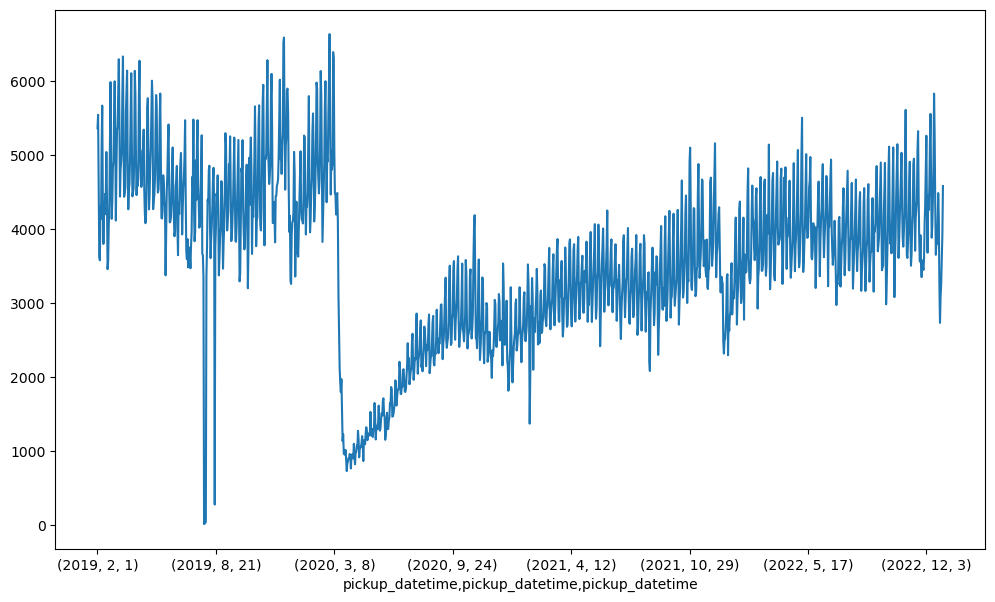

In [58]:
uber_daily['trip_distance','count'].plot(figsize=(12,7))

<AxesSubplot:xlabel='pickup_datetime,pickup_datetime,pickup_datetime'>

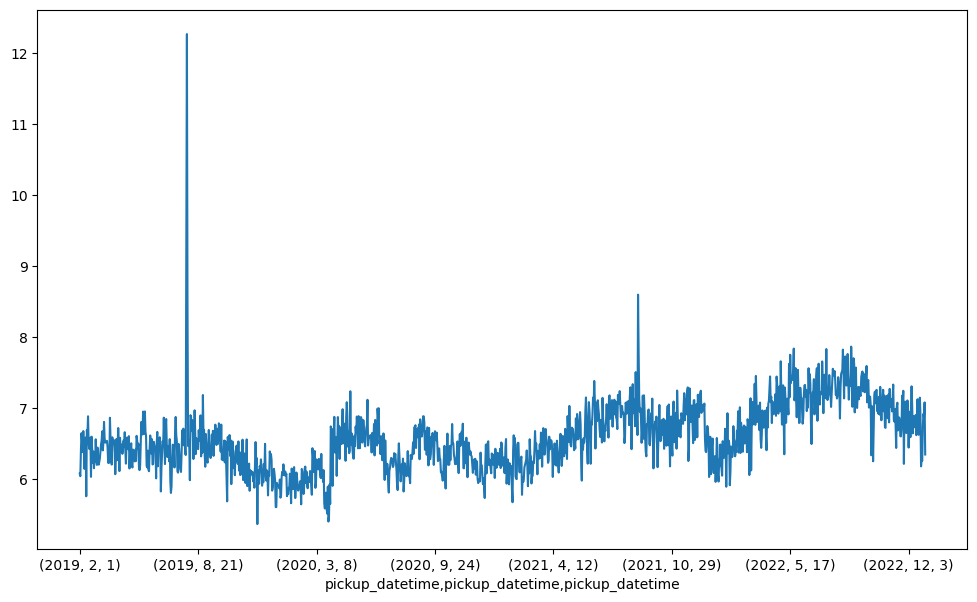

In [60]:
uber_daily['trip_distance','mean'].plot(figsize=(12,7))

In [61]:
uber_daily[uber_daily['trip_distance','mean']>12]

trip_distance             \
                                                        count       mean   
pickup_datetime pickup_datetime pickup_datetime                            
2019            8               1                          16  12.263169   

                                                 trip_time  \
                                                      mean   
pickup_datetime pickup_datetime pickup_datetime              
2019            8               1                1686.3125   

                                                base_passenger_fare   tips  \
                                                               mean   mean   
pickup_datetime pickup_datetime pickup_datetime                              
2019            8               1                         31.633125  0.125   

                                                driver_pay average_speed  
                                                      mean          mean  
pickup_datetime pickup_datetime pickup_datetime                           
2019            8               1                   28.575     22.957519

<AxesSubplot:xlabel='pickup_datetime,pickup_datetime,pickup_datetime'>

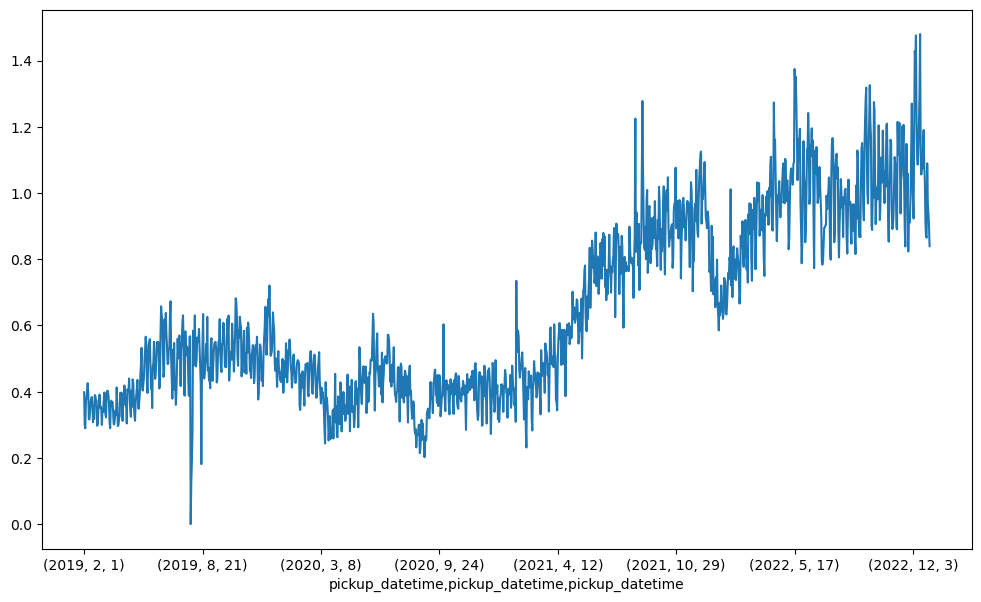

In [59]:
uber_daily['tips','mean'].plot(figsize=(12,7))

<AxesSubplot:xlabel='pickup_datetime,pickup_datetime,pickup_datetime'>

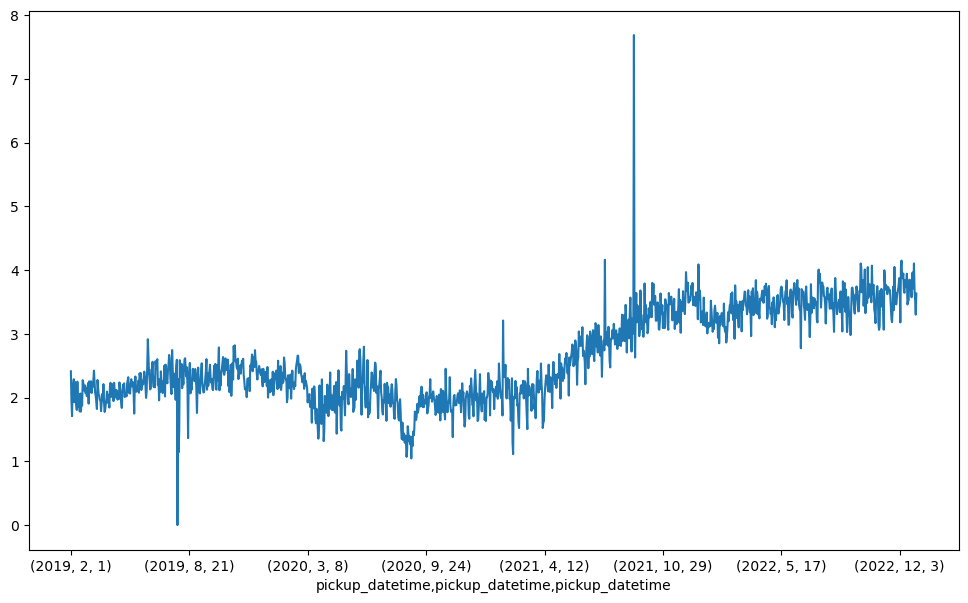

In [150]:
uber_daily['tip_rate','mean'].plot(figsize=(12,7))

# -3. 스리슬쩍 주가랑 연결해보기

In [65]:
uber_stock = pd.read_csv('D:/Working_Place/new_uber/data/UBER.csv')
uber_stock.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-10,42.000000,45.000000,41.060001,41.570000,41.570000,186322500
1,2019-05-13,38.790001,39.240002,36.080002,37.099998,37.099998,79442400
2,2019-05-14,38.310001,39.959999,36.849998,39.959999,39.959999,46661100
3,2019-05-15,39.369999,41.880001,38.950001,41.290001,41.290001,36086100
4,2019-05-16,41.480000,44.060001,41.250000,43.000000,43.000000,38115500
5,2019-05-17,41.980000,43.290001,41.270000,41.910000,41.910000,20225700
6,2019-05-20,41.189999,41.680000,39.459999,41.590000,41.590000,29222300
7,2019-05-21,42.000000,42.240002,41.250000,41.500000,41.500000,10802900
8,2019-05-22,41.049999,41.279999,40.500000,41.250000,41.250000,9089500
9,2019-05-23,40.799999,41.090000,40.020000,40.470001,40.470001,11119900


In [78]:
uber_daily.loc[2019,2,1]['tips','mean']

0.3981811405143496

In [124]:
def str_to_date(date):
    year = int(date[0:4])
    month = int(date[5:7])
    day = int(date[8:])
    return year,month,day
print(str_to_date('2019-05-10'))

(2019, 5, 10)


In [90]:
tip_as_input = []
for i in uber_stock.Date:
    year,month,day = str_to_date(i)
    if year>=2023:
        break
    tip_as_input.append(uber_daily.loc[year,month,day]['tips','mean'])

In [106]:
uber_close = []
uber_volume = []
for i,j,k in zip(uber_stock.Date,uber_stock.Close,uber_stock.Volume):
    if i<'2023':
        uber_close.append(j)
        uber_volume.append(k)
len(uber_close),len(uber_volume)

(919, 919)

In [107]:
regression_ready = pd.DataFrame({'tip':tip_as_input,'close':uber_close,'volume':uber_volume})
regression_ready

,tip,close,volume
0,0.416354,41.570000,186322500
1,0.442704,37.099998,79442400
2,0.494427,39.959999,46661100
3,0.525925,41.290001,36086100
4,0.566001,43.000000,38115500
...,...,...,...
914,1.037366,24.639999,11610000
915,1.089507,24.400000,15258600
916,0.968366,24.590000,15669200
917,0.939545,24.910000,17828300


In [108]:
zeroth_regression = smf.ols("close~tip + volume", 
                           data=regression_ready).fit()
print(zeroth_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                  close   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     69.41
Date:                Sat, 28 Oct 2023   Prob (F-statistic):           8.58e-29
Time:                        16:35:55   Log-Likelihood:                -3335.9
No. Observations:                 919   AIC:                             6678.
Df Residuals:                     916   BIC:                             6692.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     47.4432      0.905     52.410      0.0

In [109]:
uber_stock

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-10,42.000000,45.000000,41.060001,41.570000,41.570000,186322500
1,2019-05-13,38.790001,39.240002,36.080002,37.099998,37.099998,79442400
2,2019-05-14,38.310001,39.959999,36.849998,39.959999,39.959999,46661100
3,2019-05-15,39.369999,41.880001,38.950001,41.290001,41.290001,36086100
4,2019-05-16,41.480000,44.060001,41.250000,43.000000,43.000000,38115500
...,...,...,...,...,...,...,...
1120,2023-10-20,42.720001,43.349998,42.259998,42.959999,42.959999,13941300
1121,2023-10-23,42.529999,43.970001,42.250000,43.040001,43.040001,11277100
1122,2023-10-24,43.500000,44.325001,43.384998,44.189999,44.189999,17566500
1123,2023-10-25,43.299999,43.490002,42.064999,42.349998,42.349998,16495900


In [112]:
uber_stock['mve']=uber_stock.Close*uber_stock.Volume
uber_stock

,Date,Open,High,Low,Close,Adj Close,Volume,mve
0,2019-05-10,42.000000,45.000000,41.060001,41.570000,41.570000,186322500,7.745426e+09
1,2019-05-13,38.790001,39.240002,36.080002,37.099998,37.099998,79442400,2.947313e+09
2,2019-05-14,38.310001,39.959999,36.849998,39.959999,39.959999,46661100,1.864578e+09
3,2019-05-15,39.369999,41.880001,38.950001,41.290001,41.290001,36086100,1.489995e+09
4,2019-05-16,41.480000,44.060001,41.250000,43.000000,43.000000,38115500,1.638966e+09
...,...,...,...,...,...,...,...,...
1120,2023-10-20,42.720001,43.349998,42.259998,42.959999,42.959999,13941300,5.989182e+08
1121,2023-10-23,42.529999,43.970001,42.250000,43.040001,43.040001,11277100,4.853664e+08
1122,2023-10-24,43.500000,44.325001,43.384998,44.189999,44.189999,17566500,7.762636e+08
1123,2023-10-25,43.299999,43.490002,42.064999,42.349998,42.349998,16495900,6.986013e+08


In [115]:
def bva(date):
    if date<='2019-06-30':
        return 30.98*(10**9)
    elif date<='2019-09-30':
        return 32.29*(10**9)
    elif date<='2019-12-31':
        return 31.76*(10**9)
    elif date<='2020-03-31':
        return 30.09*(10**9)
    elif date<='2020-06-30':
        return 28.24*(10**9)
    elif date<='2020-09-30':
        return 28.89*(10**9)
    elif date<='2020-12-31':
        return 33.25*(10**9)
    elif date<='2021-03-31':
        return 34.66*(10**9)
    elif date<='2021-06-30':
        return 36.25*(10**9)
    elif date<='2021-09-30':
        return 36.88*(10**9)
    elif date<='2021-12-31':
        return 38.77*(10**9)
    elif date<='2022-03-31':
        return 32.81*(10**9)
    elif date<='2022-06-30':
        return 31.01*(10**9)
    elif date<='2022-09-30':
        return 31.11*(10**9)
    else:
        return 32.11*(10**9)

In [116]:
uber_stock['bva'] = uber_stock.apply(lambda x: bva(x.Date),axis=1)
uber_stock

,Date,Open,High,Low,Close,Adj Close,Volume,mve,bva
0,2019-05-10,42.000000,45.000000,41.060001,41.570000,41.570000,186322500,7.745426e+09,3.098000e+10
1,2019-05-13,38.790001,39.240002,36.080002,37.099998,37.099998,79442400,2.947313e+09,3.098000e+10
2,2019-05-14,38.310001,39.959999,36.849998,39.959999,39.959999,46661100,1.864578e+09,3.098000e+10
3,2019-05-15,39.369999,41.880001,38.950001,41.290001,41.290001,36086100,1.489995e+09,3.098000e+10
4,2019-05-16,41.480000,44.060001,41.250000,43.000000,43.000000,38115500,1.638966e+09,3.098000e+10
...,...,...,...,...,...,...,...,...,...
1120,2023-10-20,42.720001,43.349998,42.259998,42.959999,42.959999,13941300,5.989182e+08,3.211000e+10
1121,2023-10-23,42.529999,43.970001,42.250000,43.040001,43.040001,11277100,4.853664e+08,3.211000e+10
1122,2023-10-24,43.500000,44.325001,43.384998,44.189999,44.189999,17566500,7.762636e+08,3.211000e+10
1123,2023-10-25,43.299999,43.490002,42.064999,42.349998,42.349998,16495900,6.986013e+08,3.211000e+10


In [117]:
def bvcl(date):
    if date<='2019-06-30':
        return 5.570*(10**9)
    elif date<='2019-09-30':
        return 5.372*(10**9)
    elif date<='2019-12-31':
        return 5.639*(10**9)
    elif date<='2020-03-31':
        return 6.631*(10**9)
    elif date<='2020-06-30':
        return 5.891*(10**9)
    elif date<='2020-09-30':
        return 6.921*(10**9)
    elif date<='2020-12-31':
        return 6.865*(10**9)
    elif date<='2021-03-31':
        return 7.288*(10**9)
    elif date<='2021-06-30':
        return 7.684*(10**9)
    elif date<='2021-09-30':
        return 8.126*(10**9)
    elif date<='2021-12-31':
        return 9.024*(10**9)
    elif date<='2022-03-31':
        return 8.652*(10**9)
    elif date<='2022-06-30':
        return 8.945*(10**9)
    elif date<='2022-09-30':
        return 9.020*(10**9)
    else:
        return 8.853*(10**9)

In [118]:
uber_stock['bvcl'] = uber_stock.apply(lambda x: bvcl(x.Date),axis=1)
uber_stock

,Date,Open,High,Low,Close,Adj Close,Volume,mve,bva,bvcl
0,2019-05-10,42.000000,45.000000,41.060001,41.570000,41.570000,186322500,7.745426e+09,3.098000e+10,5.570000e+09
1,2019-05-13,38.790001,39.240002,36.080002,37.099998,37.099998,79442400,2.947313e+09,3.098000e+10,5.570000e+09
2,2019-05-14,38.310001,39.959999,36.849998,39.959999,39.959999,46661100,1.864578e+09,3.098000e+10,5.570000e+09
3,2019-05-15,39.369999,41.880001,38.950001,41.290001,41.290001,36086100,1.489995e+09,3.098000e+10,5.570000e+09
4,2019-05-16,41.480000,44.060001,41.250000,43.000000,43.000000,38115500,1.638966e+09,3.098000e+10,5.570000e+09
...,...,...,...,...,...,...,...,...,...,...
1120,2023-10-20,42.720001,43.349998,42.259998,42.959999,42.959999,13941300,5.989182e+08,3.211000e+10,8.853000e+09
1121,2023-10-23,42.529999,43.970001,42.250000,43.040001,43.040001,11277100,4.853664e+08,3.211000e+10,8.853000e+09
1122,2023-10-24,43.500000,44.325001,43.384998,44.189999,44.189999,17566500,7.762636e+08,3.211000e+10,8.853000e+09
1123,2023-10-25,43.299999,43.490002,42.064999,42.349998,42.349998,16495900,6.986013e+08,3.211000e+10,8.853000e+09


In [119]:
uber_stock_under_2023 = uber_stock[uber_stock.Date<'2023']
uber_stock_under_2023

,Date,Open,High,Low,Close,Adj Close,Volume,mve,bva,bvcl
0,2019-05-10,42.000000,45.000000,41.060001,41.570000,41.570000,186322500,7.745426e+09,3.098000e+10,5.570000e+09
1,2019-05-13,38.790001,39.240002,36.080002,37.099998,37.099998,79442400,2.947313e+09,3.098000e+10,5.570000e+09
2,2019-05-14,38.310001,39.959999,36.849998,39.959999,39.959999,46661100,1.864578e+09,3.098000e+10,5.570000e+09
3,2019-05-15,39.369999,41.880001,38.950001,41.290001,41.290001,36086100,1.489995e+09,3.098000e+10,5.570000e+09
4,2019-05-16,41.480000,44.060001,41.250000,43.000000,43.000000,38115500,1.638966e+09,3.098000e+10,5.570000e+09
...,...,...,...,...,...,...,...,...,...,...
914,2022-12-23,24.459999,24.725000,24.162001,24.639999,24.639999,11610000,2.860704e+08,3.211000e+10,8.853000e+09
915,2022-12-27,24.290001,24.700001,23.900000,24.400000,24.400000,15258600,3.723098e+08,3.211000e+10,8.853000e+09
916,2022-12-28,24.209999,24.719999,24.020000,24.590000,24.590000,15669200,3.853056e+08,3.211000e+10,8.853000e+09
917,2022-12-29,24.750000,25.375000,24.290001,24.910000,24.910000,17828300,4.441030e+08,3.211000e+10,8.853000e+09


In [125]:
tip_as_input = []
for i in uber_stock_under_2023.Date:
    year,month,day = str_to_date(i)
    tip_as_input.append(uber_daily.loc[year,month,day]['tips','mean'])
uber_stock_under_2023['tip']=tip_as_input
uber_stock_under_2023

D:\Anaconda\envs\new_uber\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Date,Open,High,Low,Close,Adj Close,Volume,mve,bva,bvcl,tip
0,2019-05-10,42.000000,45.000000,41.060001,41.570000,41.570000,186322500,7.745426e+09,3.098000e+10,5.570000e+09,0.416354
1,2019-05-13,38.790001,39.240002,36.080002,37.099998,37.099998,79442400,2.947313e+09,3.098000e+10,5.570000e+09,0.442704
2,2019-05-14,38.310001,39.959999,36.849998,39.959999,39.959999,46661100,1.864578e+09,3.098000e+10,5.570000e+09,0.494427
3,2019-05-15,39.369999,41.880001,38.950001,41.290001,41.290001,36086100,1.489995e+09,3.098000e+10,5.570000e+09,0.525925
4,2019-05-16,41.480000,44.060001,41.250000,43.000000,43.000000,38115500,1.638966e+09,3.098000e+10,5.570000e+09,0.566001
...,...,...,...,...,...,...,...,...,...,...,...
914,2022-12-23,24.459999,24.725000,24.162001,24.639999,24.639999,11610000,2.860704e+08,3.211000e+10,8.853000e+09,1.037366
915,2022-12-27,24.290001,24.700001,23.900000,24.400000,24.400000,15258600,3.723098e+08,3.211000e+10,8.853000e+09,1.089507
916,2022-12-28,24.209999,24.719999,24.020000,24.590000,24.590000,15669200,3.853056e+08,3.211000e+10,8.853000e+09,0.968366
917,2022-12-29,24.750000,25.375000,24.290001,24.910000,24.910000,17828300,4.441030e+08,3.211000e+10,8.853000e+09,0.939545


In [127]:
first_regression = smf.ols("mve ~ bva + bvcl + tip", 
                           data=uber_stock_under_2023).fit()
print(first_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                    mve   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     20.79
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           4.91e-13
Time:                        16:45:26   Log-Likelihood:                -19843.
No. Observations:                 919   AIC:                         3.969e+04
Df Residuals:                     915   BIC:                         3.971e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.292e+08   2.24e+08     -1.918      0.0

In [133]:
uber_stock_under_2023.loc[56,'tip']=0.125
uber_stock_under_2023[uber_stock_under_2023.tip==0]

D:\Anaconda\envs\new_uber\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Date,Open,High,Low,Close,Adj Close,Volume,mve,bva,bvcl,tip


In [138]:
uber_stock_under_2023['ln_mve'] = np.log(uber_stock_under_2023.mve)
uber_stock_under_2023['ln_bva'] = np.log(uber_stock_under_2023.bva)
uber_stock_under_2023['ln_bvcl'] = np.log(uber_stock_under_2023.bvcl)
uber_stock_under_2023['ln_tip'] = np.log(uber_stock_under_2023.tip)

D:\Anaconda\envs\new_uber\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda\envs\new_uber\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\envs\new_uber\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [139]:
second_regression = smf.ols("ln_mve ~ ln_bva + ln_bvcl + ln_tip", 
                           data=uber_stock_under_2023).fit()
print(second_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                 ln_mve   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     57.93
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           2.73e-34
Time:                        16:53:30   Log-Likelihood:                -701.32
No. Observations:                 919   AIC:                             1411.
Df Residuals:                     915   BIC:                             1430.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -32.6226      5.470     -5.964      0.0

In [151]:
tip_rate_as_input = []
for i in uber_stock_under_2023.Date:
    year,month,day = str_to_date(i)
    tip_rate_as_input.append(uber_daily.loc[year,month,day]['tip_rate','mean'])
uber_stock_under_2023['tip_rate']=tip_rate_as_input
uber_stock_under_2023

D:\Anaconda\envs\new_uber\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Date,Open,High,Low,Close,Adj Close,Volume,mve,bva,bvcl,tip,ln_mve,ln_bva,ln_bvcl,ln_tip,tip_rate
0,2019-05-10,42.000000,45.000000,41.060001,41.570000,41.570000,186322500,7.745426e+09,3.098000e+10,5.570000e+09,0.416354,22.770368,24.156608,22.440661,-0.876220,2.074431
1,2019-05-13,38.790001,39.240002,36.080002,37.099998,37.099998,79442400,2.947313e+09,3.098000e+10,5.570000e+09,0.442704,21.804160,24.156608,22.440661,-0.814854,2.214306
2,2019-05-14,38.310001,39.959999,36.849998,39.959999,39.959999,46661100,1.864578e+09,3.098000e+10,5.570000e+09,0.494427,21.346300,24.156608,22.440661,-0.704355,2.289315
3,2019-05-15,39.369999,41.880001,38.950001,41.290001,41.290001,36086100,1.489995e+09,3.098000e+10,5.570000e+09,0.525925,21.122039,24.156608,22.440661,-0.642596,2.176751
4,2019-05-16,41.480000,44.060001,41.250000,43.000000,43.000000,38115500,1.638966e+09,3.098000e+10,5.570000e+09,0.566001,21.217332,24.156608,22.440661,-0.569159,2.219457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,2022-12-23,24.459999,24.725000,24.162001,24.639999,24.639999,11610000,2.860704e+08,3.211000e+10,8.853000e+09,1.037366,19.471748,24.192433,22.904022,0.036685,3.574811
915,2022-12-27,24.290001,24.700001,23.900000,24.400000,24.400000,15258600,3.723098e+08,3.211000e+10,8.853000e+09,1.089507,19.735237,24.192433,22.904022,0.085726,4.105626
916,2022-12-28,24.209999,24.719999,24.020000,24.590000,24.590000,15669200,3.853056e+08,3.211000e+10,8.853000e+09,0.968366,19.769547,24.192433,22.904022,-0.032145,3.684118
917,2022-12-29,24.750000,25.375000,24.290001,24.910000,24.910000,17828300,4.441030e+08,3.211000e+10,8.853000e+09,0.939545,19.911567,24.192433,22.904022,-0.062359,3.535639


In [154]:
uber_stock_under_2023[uber_stock_under_2023.tip_rate>0].tip_rate.min()

1.1134588379970018

In [155]:
uber_stock_under_2023[uber_stock_under_2023.tip_rate<=0]

,Date,Open,High,Low,Close,Adj Close,Volume,mve,bva,bvcl,tip,ln_mve,ln_bva,ln_bvcl,ln_tip,tip_rate
56,2019-07-31,42.599998,42.98,41.84,42.139999,42.139999,5970800,2.516095e+08,3.229000e+10,5.372000e+09,0.125,19.343389,24.198023,22.404466,-2.079442,0.0


In [156]:
uber_stock_under_2023.loc[56,'tip_rate']=1.1134588379970018

D:\Anaconda\envs\new_uber\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [157]:
uber_stock_under_2023['ln_tip_rate'] = np.log(uber_stock_under_2023.tip_rate)

D:\Anaconda\envs\new_uber\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [158]:
tip_rate_regression = smf.ols("mve ~ bva + bvcl + tip_rate", 
                           data=uber_stock_under_2023).fit()
print(tip_rate_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                    mve   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     14.77
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           2.14e-09
Time:                        09:40:37   Log-Likelihood:                -19852.
No. Observations:                 919   AIC:                         3.971e+04
Df Residuals:                     915   BIC:                         3.973e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.687e+08    2.2e+08     -0.767      0.4

In [159]:
ln_tip_rate_regression = smf.ols("ln_mve ~ ln_bva + ln_bvcl + ln_tip_rate", 
                           data=uber_stock_under_2023).fit()
print(ln_tip_rate_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                 ln_mve   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     48.38
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           5.05e-29
Time:                        09:40:59   Log-Likelihood:                -713.58
No. Observations:                 919   AIC:                             1435.
Df Residuals:                     915   BIC:                             1454.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -25.7842      5.371     -4.801      

In [184]:
uber_stock_under_2023

,Date,Open,High,Low,Close,Adj Close,Volume,mve,bva,bvcl,tip,ln_mve,ln_bva,ln_bvcl,ln_tip,tip_rate,ln_tip_rate
0,2019-05-10,42.000000,45.000000,41.060001,41.570000,41.570000,186322500,7.745426e+09,3.098000e+10,5.570000e+09,0.416354,22.770368,24.156608,22.440661,-0.876220,2.074431,0.729687
1,2019-05-13,38.790001,39.240002,36.080002,37.099998,37.099998,79442400,2.947313e+09,3.098000e+10,5.570000e+09,0.442704,21.804160,24.156608,22.440661,-0.814854,2.214306,0.794939
2,2019-05-14,38.310001,39.959999,36.849998,39.959999,39.959999,46661100,1.864578e+09,3.098000e+10,5.570000e+09,0.494427,21.346300,24.156608,22.440661,-0.704355,2.289315,0.828253
3,2019-05-15,39.369999,41.880001,38.950001,41.290001,41.290001,36086100,1.489995e+09,3.098000e+10,5.570000e+09,0.525925,21.122039,24.156608,22.440661,-0.642596,2.176751,0.777834
4,2019-05-16,41.480000,44.060001,41.250000,43.000000,43.000000,38115500,1.638966e+09,3.098000e+10,5.570000e+09,0.566001,21.217332,24.156608,22.440661,-0.569159,2.219457,0.797263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,2022-12-23,24.459999,24.725000,24.162001,24.639999,24.639999,11610000,2.860704e+08,3.211000e+10,8.853000e+09,1.037366,19.471748,24.192433,22.904022,0.036685,3.574811,1.273912
915,2022-12-27,24.290001,24.700001,23.900000,24.400000,24.400000,15258600,3.723098e+08,3.211000e+10,8.853000e+09,1.089507,19.735237,24.192433,22.904022,0.085726,4.105626,1.412358
916,2022-12-28,24.209999,24.719999,24.020000,24.590000,24.590000,15669200,3.853056e+08,3.211000e+10,8.853000e+09,0.968366,19.769547,24.192433,22.904022,-0.032145,3.684118,1.304031
917,2022-12-29,24.750000,25.375000,24.290001,24.910000,24.910000,17828300,4.441030e+08,3.211000e+10,8.853000e+09,0.939545,19.911567,24.192433,22.904022,-0.062359,3.535639,1.262894


In [186]:
uber_stock_under_2023['year'] = uber_stock_under_2023['Date'].map(lambda x: str_to_date(x)[0])
uber_stock_under_2023['month'] = uber_stock_under_2023['Date'].map(lambda x: str_to_date(x)[1])
uber_stock_under_2023['day'] = uber_stock_under_2023['Date'].map(lambda x: str_to_date(x)[2])
uber_stock_under_2023.head(10)

D:\Anaconda\envs\new_uber\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda\envs\new_uber\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\envs\new_uber\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

,Date,Open,High,Low,Close,Adj Close,Volume,mve,bva,bvcl,tip,ln_mve,ln_bva,ln_bvcl,ln_tip,tip_rate,ln_tip_rate,year,month,day
0,2019-05-10,42.000000,45.000000,41.060001,41.570000,41.570000,186322500,7.745426e+09,3.098000e+10,5.570000e+09,0.416354,22.770368,24.156608,22.440661,-0.876220,2.074431,0.729687,2019,5,10
1,2019-05-13,38.790001,39.240002,36.080002,37.099998,37.099998,79442400,2.947313e+09,3.098000e+10,5.570000e+09,0.442704,21.804160,24.156608,22.440661,-0.814854,2.214306,0.794939,2019,5,13
2,2019-05-14,38.310001,39.959999,36.849998,39.959999,39.959999,46661100,1.864578e+09,3.098000e+10,5.570000e+09,0.494427,21.346300,24.156608,22.440661,-0.704355,2.289315,0.828253,2019,5,14
3,2019-05-15,39.369999,41.880001,38.950001,41.290001,41.290001,36086100,1.489995e+09,3.098000e+10,5.570000e+09,0.525925,21.122039,24.156608,22.440661,-0.642596,2.176751,0.777834,2019,5,15
4,2019-05-16,41.480000,44.060001,41.250000,43.000000,43.000000,38115500,1.638966e+09,3.098000e+10,5.570000e+09,0.566001,21.217332,24.156608,22.440661,-0.569159,2.219457,0.797263,2019,5,16
5,2019-05-17,41.980000,43.290001,41.270000,41.910000,41.910000,20225700,8.476591e+08,3.098000e+10,5.570000e+09,0.541888,20.557989,24.156608,22.440661,-0.612697,2.243257,0.807929,2019,5,17
6,2019-05-20,41.189999,41.680000,39.459999,41.590000,41.590000,29222300,1.215355e+09,3.098000e+10,5.570000e+09,0.475946,20.918302,24.156608,22.440661,-0.742451,2.188602,0.783263,2019,5,20
7,2019-05-21,42.000000,42.240002,41.250000,41.500000,41.500000,10802900,4.483204e+08,3.098000e+10,5.570000e+09,0.538952,19.921019,24.156608,22.440661,-0.618128,2.331669,0.846584,2019,5,21
8,2019-05-22,41.049999,41.279999,40.500000,41.250000,41.250000,9089500,3.749419e+08,3.098000e+10,5.570000e+09,0.549083,19.742282,24.156608,22.440661,-0.599506,2.099605,0.741749,2019,5,22
9,2019-05-23,40.799999,41.090000,40.020000,40.470001,40.470001,11119900,4.500224e+08,3.098000e+10,5.570000e+09,0.558613,19.924808,24.156608,22.440661,-0.582299,2.092482,0.738351,2019,5,23


<AxesSubplot:>

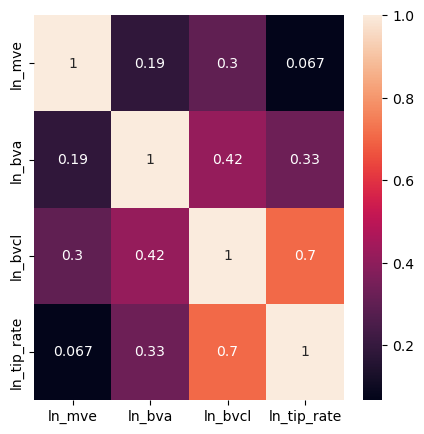

In [205]:
corr_table = uber_stock_under_2023[['ln_mve','ln_bva','ln_bvcl','ln_tip_rate']].corr()
plt.rcParams['figure.figsize']=(5,5)
sns.heatmap(corr_table, annot=True)

In [189]:
ln_tip_rate_regression_with_date = smf.ols("ln_mve ~ ln_bva + ln_bvcl + ln_tip_rate + C(year)+C(month)+C(day)", 
                                           data=uber_stock_under_2023).fit()
print(ln_tip_rate_regression_with_date.summary())

                            OLS Regression Results                            
Dep. Variable:                 ln_mve   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     16.43
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           3.13e-90
Time:                        16:56:24   Log-Likelihood:                -489.54
No. Observations:                 919   AIC:                             1075.
Df Residuals:                     871   BIC:                             1307.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -9.0618     11.924     

In [190]:
covid19=[]
for i in uber_stock_under_2023.Date:
    if i>='2020-01-13':
        covid19.append(1)
    else:
        covid19.append(0)
uber_stock_under_2023['covid19']=covid19
uber_stock_under_2023.head()

D:\Anaconda\envs\new_uber\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Date,Open,High,Low,Close,Adj Close,Volume,mve,bva,bvcl,...,ln_mve,ln_bva,ln_bvcl,ln_tip,tip_rate,ln_tip_rate,year,month,day,covid19
0,2019-05-10,42.000000,45.000000,41.060001,41.570000,41.570000,186322500,7.745426e+09,3.098000e+10,5.570000e+09,...,22.770368,24.156608,22.440661,-0.876220,2.074431,0.729687,2019,5,10,0
1,2019-05-13,38.790001,39.240002,36.080002,37.099998,37.099998,79442400,2.947313e+09,3.098000e+10,5.570000e+09,...,21.804160,24.156608,22.440661,-0.814854,2.214306,0.794939,2019,5,13,0
2,2019-05-14,38.310001,39.959999,36.849998,39.959999,39.959999,46661100,1.864578e+09,3.098000e+10,5.570000e+09,...,21.346300,24.156608,22.440661,-0.704355,2.289315,0.828253,2019,5,14,0
3,2019-05-15,39.369999,41.880001,38.950001,41.290001,41.290001,36086100,1.489995e+09,3.098000e+10,5.570000e+09,...,21.122039,24.156608,22.440661,-0.642596,2.176751,0.777834,2019,5,15,0
4,2019-05-16,41.480000,44.060001,41.250000,43.000000,43.000000,38115500,1.638966e+09,3.098000e+10,5.570000e+09,...,21.217332,24.156608,22.440661,-0.569159,2.219457,0.797263,2019,5,16,0


In [198]:
tip_rate_regression_with_date_covid19 = smf.ols("mve ~ bva + bvcl + tip_rate +C(covid19)", 
                                               data=uber_stock_under_2023).fit()
print(tip_rate_regression_with_date_covid19.summary())

                            OLS Regression Results                            
Dep. Variable:                    mve   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     16.38
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           5.72e-13
Time:                        17:05:10   Log-Likelihood:                -19842.
No. Observations:                 919   AIC:                         3.969e+04
Df Residuals:                     914   BIC:                         3.972e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -6.939e+07   2.19e+08     

In [202]:
ln_tip_rate_regression_with_date_covid19 = smf.ols("ln_mve ~ ln_bva + ln_bvcl + ln_tip_rate + C(year)+C(month)+C(day)+C(covid19)", 
                                           data=uber_stock_under_2023).fit()
print(ln_tip_rate_regression_with_date_covid19.summary())

                            OLS Regression Results                            
Dep. Variable:                 ln_mve   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     16.28
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           1.03e-90
Time:                        17:18:02   Log-Likelihood:                -486.71
No. Observations:                 919   AIC:                             1071.
Df Residuals:                     870   BIC:                             1308.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -9.9630     11.900     

# 3. Graphs

In [160]:
uber_trip_sample

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_distance,...,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag,average_speed,tip_rate
index,,,,,,,,,,,,,,,,,,,,,
1079641,HV0003,B02878,B02878,2019-02-02 09:45:14,2019-02-02 09:51:18,2019-02-02 09:52:29,2019-02-02 10:08:57,213,20,8.1788,...,0.0,2.00,8.31,Y,Y,N,N,NaN,29.831489,26.281209
18360431,HV0003,B02876,B02876,2019-02-26 14:58:01,2019-02-26 14:58:43,2019-02-26 15:00:49,2019-02-26 15:22:05,173,70,5.0876,...,0.0,3.00,17.05,N,N,N,N,NaN,14.353730,24.271845
12815512,HV0003,B02878,B02878,2019-02-18 18:27:56,2019-02-18 18:28:50,2019-02-18 18:31:32,2019-02-18 18:50:35,42,166,1.8515,...,0.0,0.00,10.77,N,N,N,N,NaN,5.836602,0.000000
10272561,HV0003,B02872,B02872,2019-02-15 08:32:59,2019-02-15 08:36:00,2019-02-15 08:37:44,2019-02-15 08:49:41,151,239,2.7209,...,0.0,0.00,7.79,N,N,N,N,NaN,13.680503,0.000000
5574976,HV0003,B02880,B02880,2019-02-08 20:39:09,2019-02-08 20:39:49,2019-02-08 20:42:41,2019-02-08 20:52:19,90,158,2.0930,...,0.0,0.00,6.62,N,N,N,N,NaN,13.035986,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2633529,HV0003,B03404,B03404,2022-12-04 19:44:40,2022-12-04 19:46:10,2022-12-04 19:47:23,2022-12-04 19:57:32,161,236,3.2522,...,0.0,0.00,8.72,N,N,,N,N,19.224828,0.000000
2098702,HV0003,B03404,B03404,2022-12-03 23:50:26,2022-12-03 23:59:09,2022-12-03 23:59:57,2022-12-04 00:09:42,256,79,3.9767,...,0.0,1.00,10.49,N,N,,N,N,24.472000,5.285412
10187430,HV0003,B03404,B03404,2022-12-16 07:39:15,2022-12-16 07:43:05,2022-12-16 07:43:54,2022-12-16 08:09:26,140,143,4.7334,...,0.0,0.00,29.44,N,N,,N,N,11.122872,0.000000


In [161]:
uber_trip_sample.columns

Index(['hvfhs_license_num', 'dispatching_base_num', 'originating_base_num',
       'request_datetime', 'on_scene_datetime', 'pickup_datetime',
       'dropoff_datetime', 'PULocationID', 'DOLocationID', 'trip_distance',
       'trip_time', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax',
       'congestion_surcharge', 'airport_fee', 'tips', 'driver_pay',
       'shared_request_flag', 'shared_match_flag', 'access_a_ride_flag',
       'wav_request_flag', 'wav_match_flag', 'average_speed', 'tip_rate'],
      dtype='object')

# -1. by Time

<AxesSubplot:xlabel='pickup_datetime'>

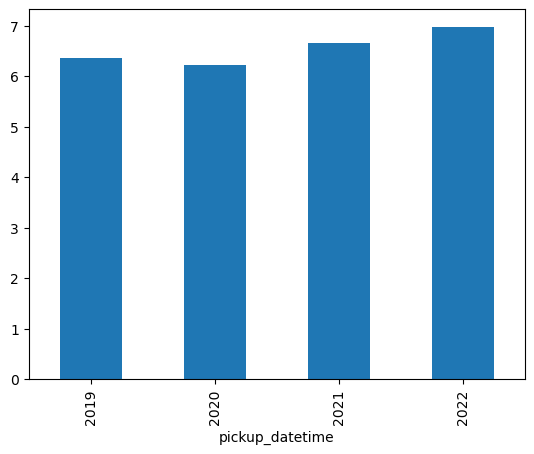

In [165]:
uber_trip_sample.groupby(uber_trip_sample.pickup_datetime.dt.year).agg({'trip_distance':['mean','var']})[('trip_distance','mean')].plot(kind='bar')

<AxesSubplot:xlabel='pickup_datetime'>

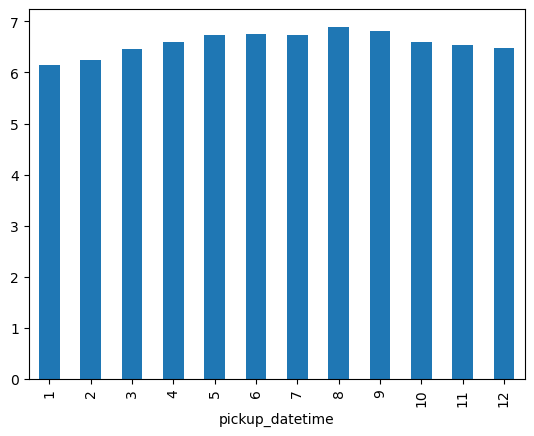

In [166]:
uber_trip_sample.groupby(uber_trip_sample.pickup_datetime.dt.month).agg({'trip_distance':['mean','var']})[('trip_distance','mean')].plot(kind='bar')

<AxesSubplot:xlabel='pickup_datetime'>

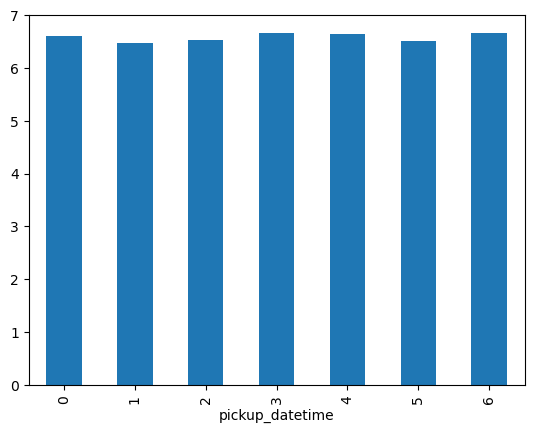

In [167]:
uber_trip_sample.groupby(uber_trip_sample.pickup_datetime.dt.weekday).agg({'trip_distance':['mean','var']})[('trip_distance','mean')].plot(kind='bar')

<AxesSubplot:xlabel='pickup_datetime'>

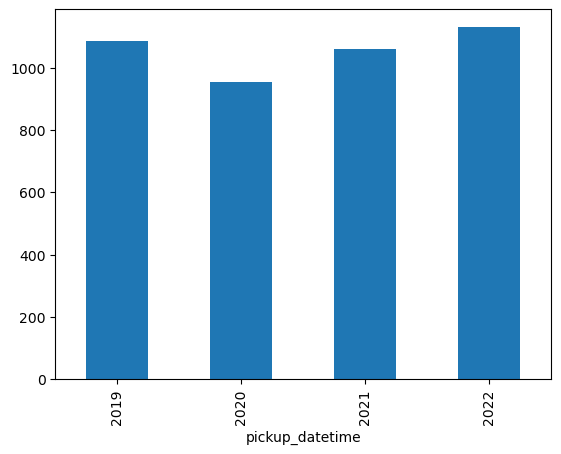

In [163]:
uber_trip_sample.groupby(uber_trip_sample.pickup_datetime.dt.year).agg({'trip_time':['mean','var']})[('trip_time','mean')].plot(kind='bar')

<AxesSubplot:xlabel='pickup_datetime'>

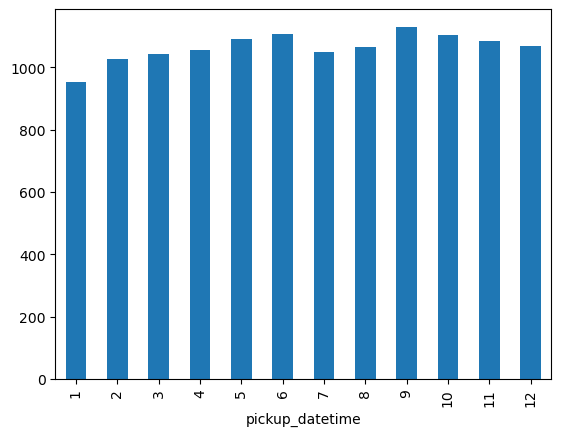

In [168]:
uber_trip_sample.groupby(uber_trip_sample.pickup_datetime.dt.month).agg({'trip_time':['mean','var']})[('trip_time','mean')].plot(kind='bar')

<AxesSubplot:xlabel='pickup_datetime'>

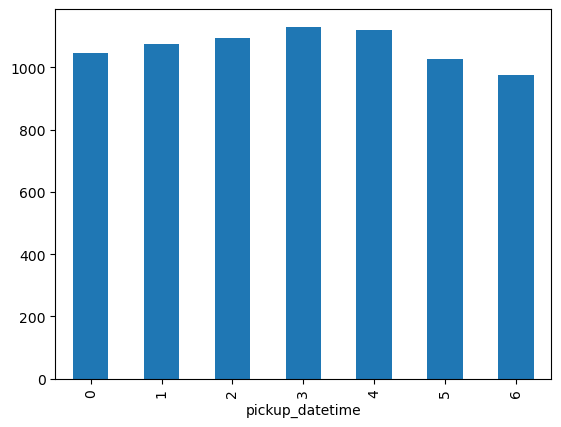

In [169]:
uber_trip_sample.groupby(uber_trip_sample.pickup_datetime.dt.weekday).agg({'trip_time':['mean','var']})[('trip_time','mean')].plot(kind='bar')

<AxesSubplot:xlabel='pickup_datetime'>

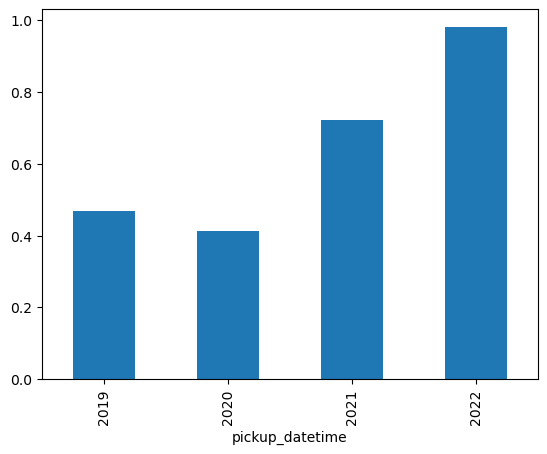

In [171]:
uber_trip_sample.groupby(uber_trip_sample.pickup_datetime.dt.year).agg({'tips':['mean','var']})[('tips','mean')].plot(kind='bar')

<AxesSubplot:xlabel='pickup_datetime'>

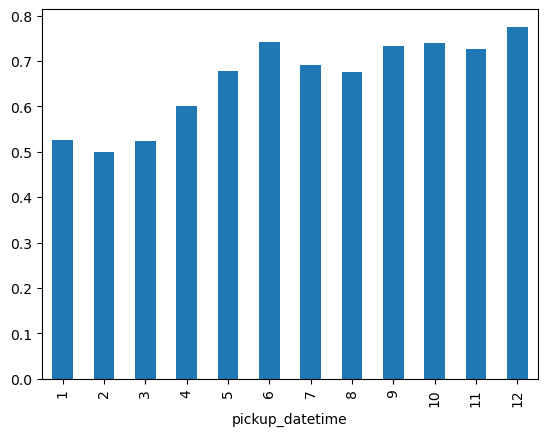

In [172]:
uber_trip_sample.groupby(uber_trip_sample.pickup_datetime.dt.month).agg({'tips':['mean','var']})[('tips','mean')].plot(kind='bar')

<AxesSubplot:xlabel='pickup_datetime'>

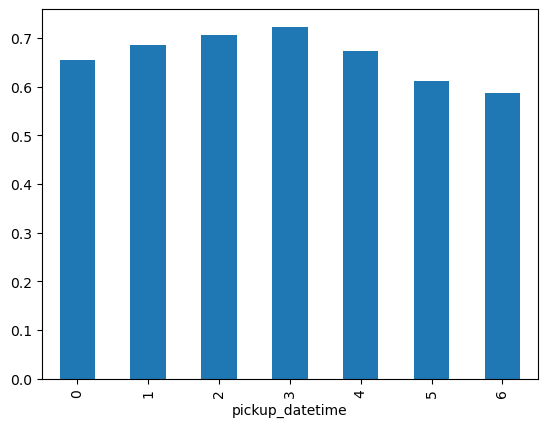

In [173]:
uber_trip_sample.groupby(uber_trip_sample.pickup_datetime.dt.weekday).agg({'tips':['mean','var']})[('tips','mean')].plot(kind='bar')

<AxesSubplot:xlabel='pickup_datetime'>

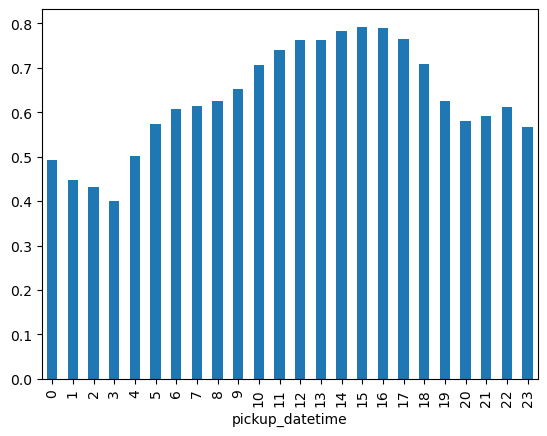

In [177]:
uber_trip_sample.groupby(uber_trip_sample.pickup_datetime.dt.hour).agg({'tips':['mean','var']})[('tips','mean')].plot(kind='bar')

<AxesSubplot:xlabel='pickup_datetime'>

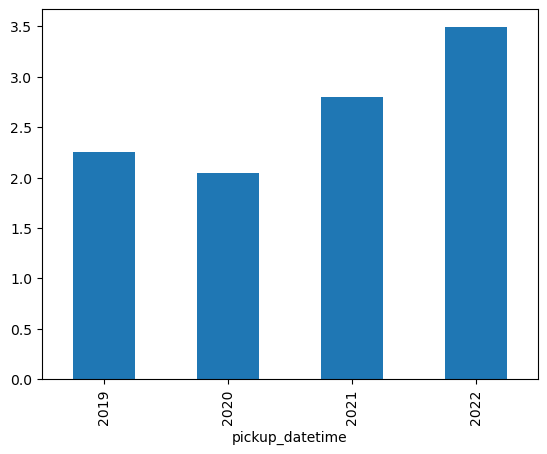

In [174]:
uber_trip_sample.groupby(uber_trip_sample.pickup_datetime.dt.year).agg({'tip_rate':['mean','var']})[('tip_rate','mean')].plot(kind='bar')

<AxesSubplot:xlabel='pickup_datetime'>

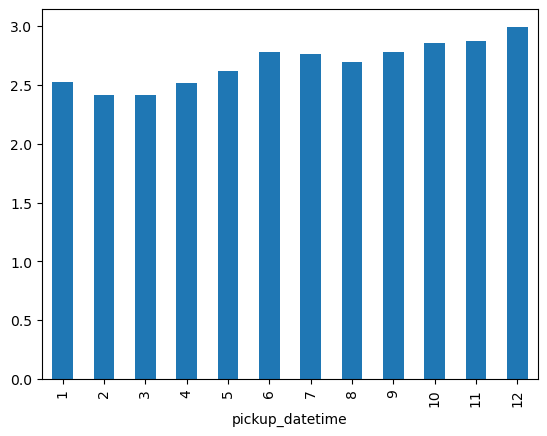

In [175]:
uber_trip_sample.groupby(uber_trip_sample.pickup_datetime.dt.month).agg({'tip_rate':['mean','var']})[('tip_rate','mean')].plot(kind='bar')

<AxesSubplot:xlabel='pickup_datetime'>

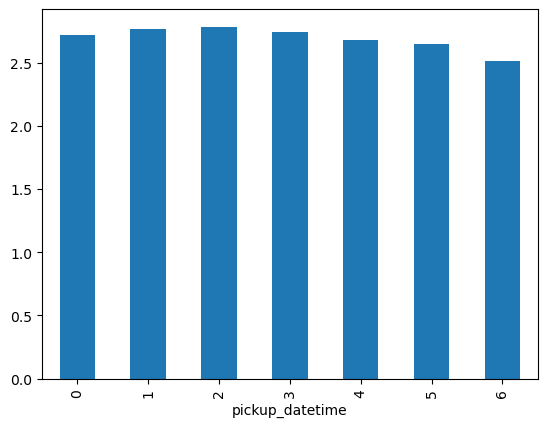

In [176]:
uber_trip_sample.groupby(uber_trip_sample.pickup_datetime.dt.weekday).agg({'tip_rate':['mean','var']})[('tip_rate','mean')].plot(kind='bar')

<AxesSubplot:xlabel='pickup_datetime'>

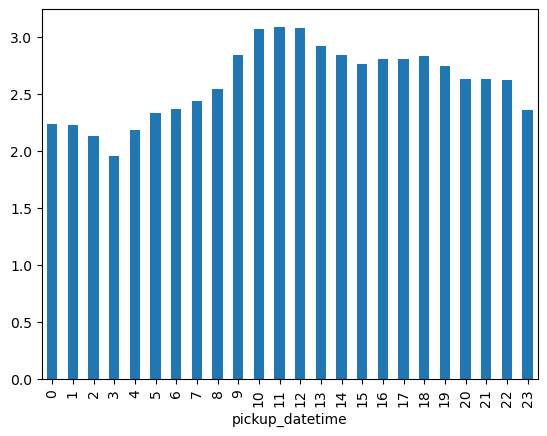

In [178]:
uber_trip_sample.groupby(uber_trip_sample.pickup_datetime.dt.hour).agg({'tip_rate':['mean','var']})[('tip_rate','mean')].plot(kind='bar')